# Assignment 4
## Due May 15th

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

Here you would normaly get a "RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility" warning. You do not since we silenced the warning in the first cell. If you are interested read here
https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility

In [3]:
def get_data_x_cube(n):
 
 x = np.random.uniform(0, 4, n)
 X = np.expand_dims(x, axis=-1)
 y = 3*(x-2)**3 + 0.1*np.random.normal(0, 1, n)
 Y = np.expand_dims(y, axis=-1)
 
 return X, Y

In [4]:
def get_data(n):
 
 x = np.random.uniform(0, 4, n)
 X = np.expand_dims(x, axis=-1)
 y = x + np.random.normal(0, 3, n)
 Y = np.expand_dims(y, axis=-1)
 
 return X, Y

# Exercise 1

### a)

In [5]:
def MSE(Y_pred, Y):
 return np.mean((Y_pred - Y) ** 2)

### b)

In [6]:
def k_fold_evaluation_MSE(classifier, X, Y, K=10):
 kMSEs = []
 for k in range(K):
 xtest_set = X[k]
 ytest_set = Y[k]

 xtrain_set = [x for x in X if x not in xtest_set]
 xtrain_set = np.asarray(xtrain_set).flatten()
 xtrain_set = xtrain_set.reshape(xtrain_set.shape[0],1)

 ytrain_set = [y for y in Y if y not in ytest_set]
 ytrain_set = np.asarray(ytrain_set).flatten()
 ytrain_set = ytrain_set.reshape(ytrain_set.shape[0], 1)

 classifier.fit(xtrain_set, ytrain_set)
 Y_pred = classifier.predict(xtest_set)
 kMSE = MSE(Y_pred,ytest_set)
 kMSEs.append(kMSE)
 return np.array(kMSEs).mean()

### c)

In [7]:
def k_fold_cv_ridge(X, Y, lambdas, K=10):
 n = int(math.ceil(len(X) / float(K)))
 KX = [X[i:i + n] for i in range(0, len(X), n)]
 KY = [Y[i:i + n] for i in range(0, len(Y), n)]
 meanMSEs = []
 for l in lambdas:
 c = Ridge(l)
 meanMSE = k_fold_evaluation_MSE(c, KX, KY, K)
 meanMSEs.append(meanMSE)
 
 return meanMSEs
 

### d)

When we ask to plot the errors please use this convenction red = cv, blue = test. You can see in e) how to do it

In [8]:
X, Y = get_data_x_cube(300)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]

avg_validation_errors is [13.512247052325714, 13.512292475997555, 13.512788001625083, 13.521806543324747, 13.959857975743859, 28.233357606583496]


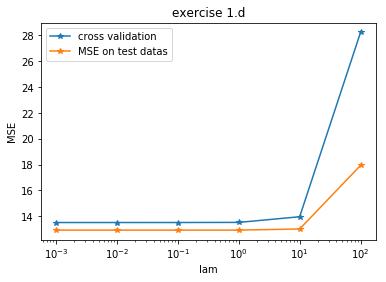

In [9]:
K=10

lambdas=[0.001, 0.01, 0.1, 1, 10, 100]
test_MSEs = []

avg_validation_MSEs = k_fold_cv_ridge(X_train, Y_train, lambdas, K)

for l in lambdas:
 c = Ridge(l)
 c.fit(X_test, Y_test)
 test_Y_pred = c.predict(X_test)
 test_mse = MSE(test_Y_pred, Y_test)
 test_MSEs.append(test_mse)
 

print('avg_validation_errors is ', avg_validation_MSEs)

fig = plt.figure()
l1, = plt.semilogx(lambdas, avg_validation_MSEs, '*-')
l2, = plt.semilogx(lambdas, test_MSEs, '*-')
plt.xlabel('lam')
plt.ylabel('MSE')
plt.title('exercise 1.d')
plt.legend(handles = [l1, l2,], labels = ['cross validation', 'MSE on test datas'], loc = 'best')
plt.show()


The MSEs on MSE data sets are always lower than cross validation. When parameters are not so good, the cross validation will produce worse MSE than on test datas.

### e)

In [10]:
X, Y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=420)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]

In [11]:
ks = np.arange(1,11)
parameters = {'n_neighbors': ks}
clf = GridSearchCV(KNeighborsClassifier(weights="uniform"), parameters)
clf.fit(X_train, Y_train)
accuracy_cv = clf.cv_results_['mean_train_score']

In [12]:
accuracy = np.zeros(len(ks))
 
for i, k in enumerate(ks):
 
 knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
 knn.fit(X_train, Y_train)
 accuracy[i] = knn.score(X_test, Y_test)

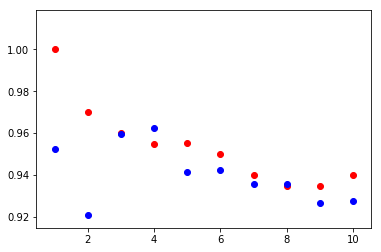

In [13]:
plt.figure()
plt.scatter(ks, accuracy_cv, c="red")
plt.scatter(ks, accuracy, c="blue")

In [14]:
accuracy_cv, accuracy

(array([ 1. , 0.9701426 , 0.96004159, 0.95499109, 0.95513963,
 0.95008913, 0.93998812, 0.93493761, 0.93493761, 0.93998812]),
 array([ 0.95260664, 0.92101106, 0.95945234, 0.9626119 , 0.94154818,
 0.94260137, 0.93575566, 0.93575566, 0.92680358, 0.92785677]))

The method that using cross validation to choose best parameter is not always right.
And the result of KNN with cross validation align with it.
Like the result picture, according to the accuracy on test data, the best K should be 2, but on cross validation, the best K is 9, which are quite different.

# Exercise 2

In [15]:
X, Y = get_data(400)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]

print(X_train.shape)

(100, 1)


### a)

In [16]:
linear = LinearRegression()
linear.fit(X_train, Y_train)
Y_preditct = linear.predict(X_test)
linear_MSE = MSE(Y_preditct, Y_test)
print("MSE between Y_test and the predictions is %f"%linear_MSE)

MSE between Y_test and the predictions is 9.482445


### b)

avg_validation_errors is [8.4273583836678565, 8.427353637714587, 8.4273067793005563, 8.4268972893193173, 8.4278142054614662, 8.5757623626898187]
best lambda accroding to cv is 1.000000
test error is [9.2656566283333621, 9.2656566292775846, 9.2656567236584433, 9.2656661206919324, 9.2665661928859553, 9.3276581295394951]
best lambda accroding to test data is 0.001000


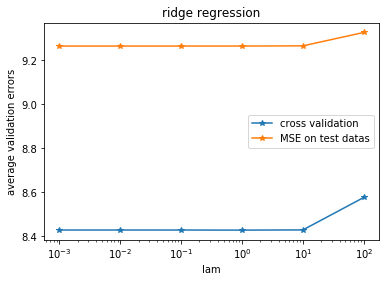

In [17]:
K=10

lambdas=[0.001, 0.01, 0.1, 1, 10, 100]
test_MSEs = []

avg_validation_MSEs = k_fold_cv_ridge(X_train, Y_train, lambdas, K)
cv_index = avg_validation_MSEs.index(min(avg_validation_MSEs))
best_cv_para = lambdas[cv_index]
print('avg_validation_errors is ', avg_validation_MSEs)
print('best lambda accroding to cv is %f'%best_cv_para)

for l in lambdas:
 c = Ridge(l)
 c.fit(X_test, Y_test)
 test_Y_pred = c.predict(X_test)
 test_mse = MSE(test_Y_pred, Y_test)
 test_MSEs.append(test_mse)
 
test_index = test_MSEs.index(min(test_MSEs))
best_test_para = lambdas[test_index]
print('test error is ', test_MSEs)
print('best lambda accroding to test data is %f'%best_test_para)

fig = plt.figure()
l1, = plt.semilogx(lambdas, avg_validation_MSEs, '*-')
l2, = plt.semilogx(lambdas, test_MSEs, '*-')
plt.xlabel('lam')
plt.ylabel('average validation errors')
plt.title('ridge regression')
plt.legend(handles = [l1, l2,], labels = ['cross validation', 'MSE on test datas'], loc = 'best')
plt.show()


In this question, the cross validation can not select the best possible λ.

### c)

avg_validation_errors is [9.81078432534383, 9.7979699798962709, 9.6771178715865069, 9.1738496719903768, 9.1657141667735367, 9.1657141667735367]
best lambda accroding to cv is 10.000000
test error is [12.566892532519873, 12.547354631984804, 12.358377573360267, 11.108801659726804, 10.917363611903159, 10.917363611903159]
best lambda accroding to test data is 10.000000


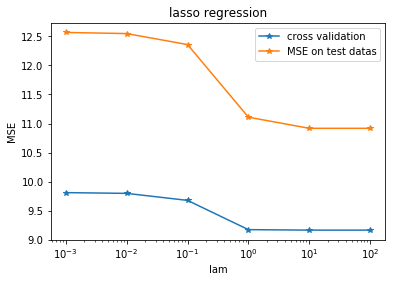

In [18]:
def k_fold_cv_lasso(X, Y, lambdas, K=10):
 n = int(math.ceil(len(X) / float(K)))
 KX = [X[i:i + n] for i in range(0, len(X), n)]
 KY = [Y[i:i + n] for i in range(0, len(Y), n)]
 meanMSEs = []
 for l in lambdas:
 c = Lasso(l)
 meanMSE = k_fold_evaluation_MSE(c, KX, KY, K)
 meanMSEs.append(meanMSE)
 
 return meanMSEs

K=10

lambdas=[0.001, 0.01, 0.1, 1, 10, 100]
test_MSEs = []

avg_validation_MSEs = k_fold_cv_lasso(X_train, Y_train, lambdas, K)
cv_index = avg_validation_MSEs.index(min(avg_validation_MSEs))
best_cv_para = lambdas[cv_index]
print('avg_validation_errors is ', avg_validation_MSEs)
print('best lambda accroding to cv is %f'%best_cv_para)

for l in lambdas:
 c = Lasso(l)
 c.fit(X_test, Y_test)
 test_Y_pred = c.predict(X_test)
 test_mse = MSE(test_Y_pred, Y_test)
 test_MSEs.append(test_mse)
 
test_index = test_MSEs.index(min(test_MSEs))
best_test_para = lambdas[test_index]
print('test error is ', test_MSEs)
print('best lambda accroding to test data is %f'%best_test_para)

fig = plt.figure()
l1, = plt.semilogx(lambdas, avg_validation_MSEs, '*-')
l2, = plt.semilogx(lambdas, test_MSEs, '*-')
plt.xlabel('lam')
plt.ylabel('MSE')
plt.title('lasso regression')
plt.legend(handles = [l1, l2,], labels = ['cross validation', 'MSE on test datas'], loc = 'best')
plt.show()


In this question, the cross validation can select the best possible λ.

### d) Discuss what you see in the graphs, which regressions works best? Does changing λ do what you expect?

Generally the ridge regression has an better performance. Because ridge has lower MSE values.

In Ridge regression, between 0.001 and 10, there is no big difference with the change of lambda.
Compared to lasso regression, the change is much more remarkable.
